In [29]:
import numpy as np
import pandas as pd

# 3D visualization

In [33]:

# Define the vertices of the cube
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

# Function to rotate the vertices in 3D
def rotate_cube(vertices, angles):
    # Convert angles to radians
    angles_rad = np.radians(angles)
    
    # Define the rotation matrices
    rotation_x = np.array([
        [1, 0, 0],
        [0, np.cos(angles_rad[0]), -np.sin(angles_rad[0])],
        [0, np.sin(angles_rad[0]), np.cos(angles_rad[0])]
    ])
    
    rotation_y = np.array([
        [np.cos(angles_rad[1]), 0, np.sin(angles_rad[1])],
        [0, 1, 0],
        [-np.sin(angles_rad[1]), 0, np.cos(angles_rad[1])]
    ])
    
    rotation_z = np.array([
        [np.cos(angles_rad[2]), -np.sin(angles_rad[2]), 0],
        [np.sin(angles_rad[2]), np.cos(angles_rad[2]), 0],
        [0, 0, 1]
    ])
    
    # Rotate the vertices
    rotated_vertices = np.dot(vertices, rotation_x)
    rotated_vertices = np.dot(rotated_vertices, rotation_y)
    rotated_vertices = np.dot(rotated_vertices, rotation_z)
    
    return rotated_vertices

# Set the rotation angles (in degrees) for each axis (x, y, z)
rotation_angles = [20, 20, 10]
# rotation_angles = [0, 0, 0]

# Rotate the cube vertices
cube = rotate_cube(vertices, rotation_angles)

# Print the rotated vertices coordinates
for vertex in cube:
    print(vertex)

edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

[0. 0. 0.]
[ 0.92541658 -0.16317591  0.34202014]
[1.20379311 0.74192769 0.02062634]
[ 0.27837653  0.9051036  -0.3213938 ]
[-0.25711994  0.39263354  0.88302222]
[0.66829664 0.22945763 1.22504236]
[0.94667318 1.13456123 0.90364856]
[0.0212566  1.29773714 0.56162842]


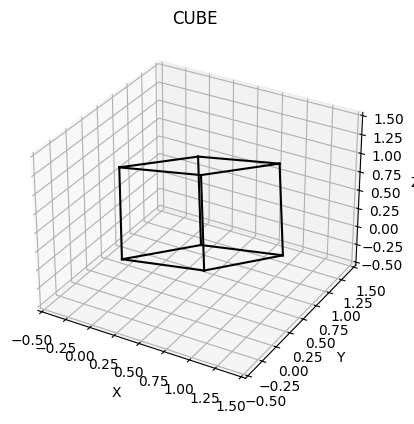

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# distance = lambda x, y: (x - y).dot(x - y)
# for edge in edges:
#     print(distance(rotated_vertices[edge[0]], rotated_vertices[edge[1]]))

# Plot the cube
for edge in edges:
    ax.plot([cube[edge[0]][0], cube[edge[1]][0]],
            [cube[edge[0]][1], cube[edge[1]][1]],
            [cube[edge[0]][2], cube[edge[1]][2]], 'k-')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# # Set axis limits
ax.set_xlim(-.5, 1.5)
ax.set_ylim(-.5, 1.5)
ax.set_zlim(-.5, 1.5)

# Show the plot
plt.title("CUBE")
plt.show()

In [35]:
from geometry_metrics import sample_distortion, sample_unit_gaussian

C:\Users\bimia\AppData\Local\Temp\ipykernel_20884\2746734845.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(


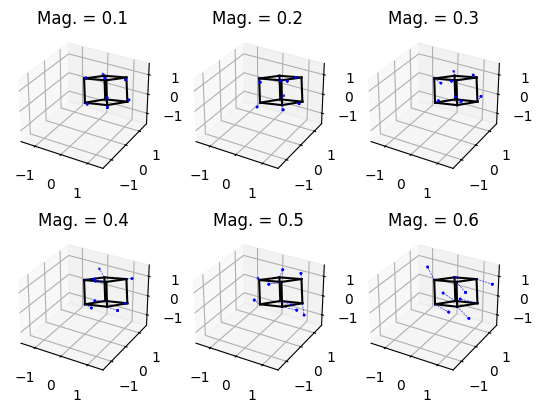

In [36]:
np.random.seed(2697)

fig = plt.figure()

# magnitude = 0.6
for fig_index, magnitude in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]):
    ax = fig.add_subplot(2, 3, fig_index+1, projection='3d')
    cube_distort = cube.copy()
    for i in range(cube.shape[0]):
        cube_distort[i, :] += sample_distortion(dimension=3, magnitude=magnitude).flatten()


    # Plot the cube
    for edge in edges:
        ax.plot([cube[edge[0]][0], cube[edge[1]][0]],
                [cube[edge[0]][1], cube[edge[1]][1]],
                [cube[edge[0]][2], cube[edge[1]][2]], 'k-')

    # plot the distorted one
    for edge in edges:
        ax.scatter([cube_distort[edge[0]][0], cube_distort[edge[1]][0]],
                [cube_distort[edge[0]][1], cube_distort[edge[1]][1]],
                [cube_distort[edge[0]][2], cube_distort[edge[1]][2]], 'k-', color='blue', s = 1)

    # Plot the line between the original vertex to the distorted vertex
    for i in range(cube.shape[0]):
        ax.plot(
            [cube[i][0], cube_distort[i][0]],
            [cube[i][1], cube_distort[i][1]],
            [cube[i][2], cube_distort[i][2]], 'k--', color='blue', linewidth=0.4
        )

    # # Set axis labels
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')

    # # Set axis limits
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)

    # Show the plot
    plt.title(f"Mag. = {magnitude}")



plt.show()


C:\Users\bimia\AppData\Local\Temp\ipykernel_20884\412938792.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([cube_distort[edge[0]][0], cube_distort[edge[1]][0]],


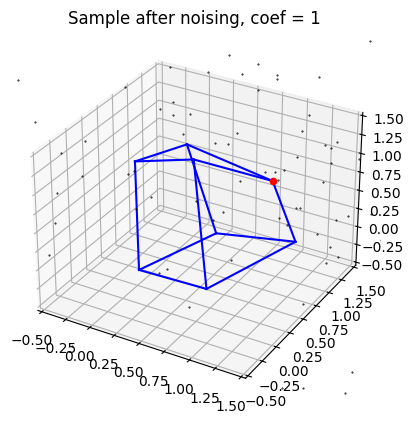

In [37]:
np.random.seed(2697)

fig = plt.figure()

magnitude = 0.2

cube_distort = cube.copy()
for i in range(cube.shape[0]):
    cube_distort[i, :] += sample_distortion(dimension=3, magnitude=magnitude).flatten()

ax = fig.add_subplot(111, projection='3d')

# plot the distorted cube
for edge in edges:
    ax.plot([cube_distort[edge[0]][0], cube_distort[edge[1]][0]],
            [cube_distort[edge[0]][1], cube_distort[edge[1]][1]],
            [cube_distort[edge[0]][2], cube_distort[edge[1]][2]], 'k-', color='blue')

v_id = 6
nsamples = 100
central = cube_distort[v_id]
noise_coef = 1
noised_point = [central + sample_unit_gaussian(dim=3) * noise_coef for _ in range(nsamples)]

ax.scatter(*central, color='red', s = 20)

for p in noised_point:
    ax.scatter(*p, color='black', s = 0.2)


# # Set axis labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # Set axis limits
ax.set_xlim(-.5, 1.5)
ax.set_ylim(-.5, 1.5)
ax.set_zlim(-.5, 1.5)

# Show the plot
# plt.title(f"Mag. = {magnitude}")

plt.title(f"Sample after noising, coef = {noise_coef}")

plt.show()


# Calculation in 100-dimensional space

In [38]:
import numpy as np
np.random.seed(10001)
dimension = 100
hi_dim_cube = np.array([
    [0, 0, 0] + [0] * 97,
    [1, 0, 0] + [0] * 97,
    [1, 1, 0] + [0] * 97,
    [0, 1, 0] + [0] * 97,
    [0, 0, 1] + [0] * 97,
    [1, 0, 1] + [0] * 97,
    [1, 1, 1] + [0] * 97,
    [0, 1, 1] + [0] * 97
]).astype("float")

magnitude = 1
noise_coef = 0.2

hi_dim_cube_distort = hi_dim_cube.copy()
hi_dim_cube_distort += sample_distortion(dimension=dimension, magnitude=magnitude, size=8)

hi_dim_cube_noised = hi_dim_cube_distort.copy()
for i in range(hi_dim_cube.shape[0]):
    hi_dim_cube_noised[i] += sample_unit_gaussian(dimension) * noise_coef


(792, 3)
(792, 100)


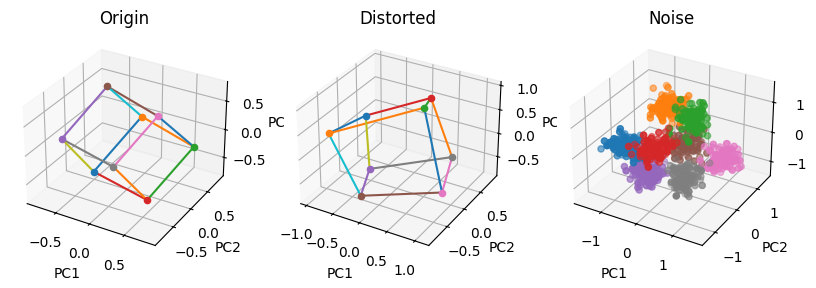

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
a1 = pca.fit_transform(hi_dim_cube)
a2 = pca.fit_transform(hi_dim_cube_distort)

DEFAULT_EDGE = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

def plot_3d_cube(ax, cube, edges = DEFAULT_EDGE):
    for edge in edges:
        ax.plot(
            [cube[edge[0]][0], cube[edge[1]][0]],
            [cube[edge[0]][1], cube[edge[1]][1]],
            [cube[edge[0]][2], cube[edge[1]][2]],
        )
    for i in range(cube.shape[0]):
        ax.scatter(*cube[i])
        

fig = plt.figure(figsize = (10, 3))

for fig_index, (cube, title) in enumerate(zip([a1, a2], ['Origin', 'Distorted'])):
    ax = fig.add_subplot(1, 3, fig_index + 1, projection='3d')
    plot_3d_cube(ax, cube)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(title)

nsamples = 99
point_clouds = []
for i in range(hi_dim_cube_distort.shape[0]):
    central = hi_dim_cube_distort[i]
    point_clouds += [sample_unit_gaussian(100) * noise_coef + central for _ in range(nsamples)]
point_clouds = np.array(point_clouds)

a3 = pca.fit_transform(point_clouds)
print(a3.shape)
ax = fig.add_subplot(1, 3, 3, projection = '3d')

for i in range(hi_dim_cube_distort.shape[0]):
    ax.scatter(a3[i * nsamples: (i+1) * nsamples, 0],
                a3[i * nsamples: (i+1) * nsamples, 1],
                a3[i * nsamples: (i+1) * nsamples, 2],)
ax.set_title("Noise")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
print(point_clouds.shape)
# print(a1.shape, a2.shape, a3.shape)

# Calculate metrics

In [13]:
from geometry_metrics import shattering_dimensionality, CCGP

#sampling dichotomy: 35 [(4, 5, 6, 7), (3, 5, 6, 7), (3, 4, 6, 7), (3, 4, 5, 7), (3, 4, 5, 6), (2, 5, 6, 7), (2, 4, 6, 7), (2, 4, 5, 7), (2, 4, 5, 6), (2, 3, 6, 7), (2, 3, 5, 7), (2, 3, 5, 6), (2, 3, 4, 7), (2, 3, 4, 6), (2, 3, 4, 5), (1, 5, 6, 7), (1, 4, 6, 7), (1, 4, 5, 7), (1, 4, 5, 6), (1, 3, 6, 7), (1, 3, 5, 7), (1, 3, 5, 6), (1, 3, 4, 7), (1, 3, 4, 6), (1, 3, 4, 5), (1, 2, 6, 7), (1, 2, 5, 7), (1, 2, 5, 6), (1, 2, 4, 7), (1, 2, 4, 6), (1, 2, 4, 5), (1, 2, 3, 7), (1, 2, 3, 6), (1, 2, 3, 5), (1, 2, 3, 4)]


array([0.99875, 0.99125, 0.99875, 0.98   , 0.9775 , 0.99875, 0.98875,
       0.97625, 0.9925 , 1.     , 0.9775 , 0.995  , 0.99   , 0.99   ,
       0.96125, 0.9975 , 0.9825 , 0.9925 , 0.99875, 0.98   , 0.97625,
       0.97625, 0.9825 , 0.97375, 0.98625, 0.98875, 0.98875, 1.     ,
       0.97375, 0.9825 , 0.995  , 0.995  , 0.9975 , 0.99375, 0.9925 ])

In [26]:
a1 = [[0,1,2,3], [0,1,4,5], [0,2,4,6]]
a2 = [[4,5,6,7], [2,3,6,7], [1,3,5,7]]


a1 = [[0,1,2,3,4,5,6,7], [0,1,4,5,8,9,12,13], [0,2,4,6,8,10,12,14], [0,1,2,3,8,9,10,11]]
a2 = [[x for x in range(16) if x not in a1_this] for a1_this in a1]
a1, a2

([[0, 1, 2, 3, 4, 5, 6, 7],
  [0, 1, 4, 5, 8, 9, 12, 13],
  [0, 2, 4, 6, 8, 10, 12, 14],
  [0, 1, 2, 3, 8, 9, 10, 11]],
 [[8, 9, 10, 11, 12, 13, 14, 15],
  [2, 3, 6, 7, 10, 11, 14, 15],
  [1, 3, 5, 7, 9, 11, 13, 15],
  [4, 5, 6, 7, 12, 13, 14, 15]])

# Higher dimensional hypercube and higher embedding space

In [16]:
cube_dimension = 4
embed_dimension = 100
noise_coef = 1
distort_magnitude = 0.25

hi_dim_cube = generate_hypercube_in_embedding_space(cube_dimension, embed_dimension, choice = [-1, 1])
qlen = hi_dim_cube.shape[0]
hi_dim_cube_distort = hi_dim_cube + sample_distortion(embed_dimension, distort_magnitude, size = qlen)

sd = shattering_dimensionality(hi_dim_cube_distort, noise_coef = noise_coef, sample_dichotomy=1000, verbose = True)
sd
# ccgp = CCGP(hi_dim_cube_distort, noise_coef=noise_coef, first_K=cube_dimension, verbose = True)
# ccgp

#sampling dichotomy: 1000 [(1, 2, 3, 5, 7, 8, 9, 11), (2, 3, 4, 8, 9, 11, 13, 15), (1, 2, 5, 6, 8, 9, 11, 14), (1, 4, 5, 8, 9, 12, 13, 15), (5, 6, 8, 9, 10, 11, 14, 15), (1, 4, 5, 6, 7, 8, 10, 14), (5, 6, 8, 9, 11, 12, 13, 15), (1, 3, 7, 9, 11, 12, 14, 15), (1, 5, 6, 7, 8, 11, 12, 14), (4, 5, 8, 10, 11, 12, 13, 15), (2, 3, 5, 6, 7, 9, 12, 13), (1, 2, 4, 7, 8, 12, 14, 15), (1, 3, 6, 7, 9, 10, 11, 14), (1, 2, 3, 7, 10, 11, 13, 14), (2, 4, 6, 8, 10, 12, 14, 15), (3, 9, 10, 11, 12, 13, 14, 15), (7, 8, 9, 10, 11, 12, 13, 15), (1, 4, 8, 9, 10, 11, 13, 15), (1, 3, 5, 6, 7, 12, 13, 14), (1, 4, 5, 6, 7, 11, 12, 14), (3, 6, 7, 8, 9, 11, 14, 15), (1, 3, 4, 8, 10, 11, 13, 15), (2, 5, 6, 10, 11, 12, 14, 15), (2, 4, 6, 8, 10, 12, 13, 15), (1, 5, 9, 11, 12, 13, 14, 15), (1, 2, 3, 4, 5, 9, 12, 14), (1, 2, 3, 6, 12, 13, 14, 15), (1, 2, 3, 5, 8, 9, 10, 12), (1, 2, 3, 4, 7, 9, 12, 14), (2, 5, 6, 7, 8, 9, 10, 15), (5, 6, 7, 8, 9, 10, 13, 14), (1, 4, 5, 6, 7, 8, 10, 13), (2, 4, 5, 6, 7, 9, 14, 15), (1, 2, 

array([0.76    , 0.651875, 0.643125, 0.803125, 0.71125 , 0.660625,
       0.725   , 0.735625, 0.6275  , 0.710625, 0.661875, 0.639375,
       0.70875 , 0.719375, 0.799375, 0.784375, 0.7825  , 0.735   ,
       0.7225  , 0.681875, 0.705625, 0.67625 , 0.725   , 0.7175  ,
       0.778125, 0.64375 , 0.62625 , 0.700625, 0.633125, 0.63125 ,
       0.6575  , 0.678125, 0.729375, 0.619375, 0.645625, 0.74375 ,
       0.61625 , 0.62875 , 0.690625, 0.7225  , 0.62125 , 0.709375,
       0.650625, 0.751875, 0.705   , 0.693125, 0.646875, 0.72375 ,
       0.633125, 0.63625 , 0.769375, 0.645   , 0.70125 , 0.633125,
       0.713125, 0.660625, 0.713125, 0.65    , 0.629375, 0.634375,
       0.699375, 0.7025  , 0.618125, 0.6275  , 0.699375, 0.613125,
       0.629375, 0.74375 , 0.65375 , 0.703125, 0.69375 , 0.64375 ,
       0.73375 , 0.644375, 0.59875 , 0.73375 , 0.6275  , 0.71125 ,
       0.6275  , 0.70625 , 0.71875 , 0.66875 , 0.735   , 0.716875,
       0.724375, 0.72625 , 0.658125, 0.684375, 0.673125, 0.726

(array([ 19.,  90., 190., 171., 153., 179., 101.,  34.,  44.,  19.]),
 array([0.58875  , 0.6108125, 0.632875 , 0.6549375, 0.677    , 0.6990625,
        0.721125 , 0.7431875, 0.76525  , 0.7873125, 0.809375 ]),
 <BarContainer object of 10 artists>)

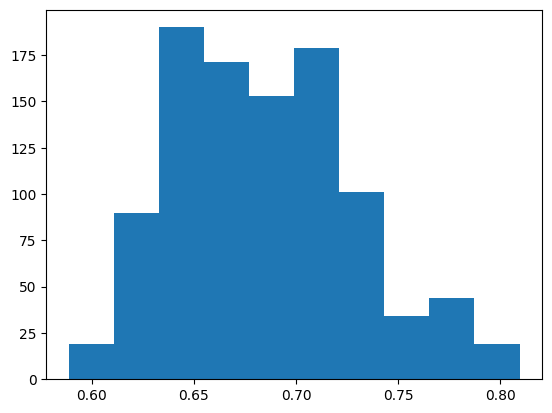

In [17]:
plt.hist(sd)
# plt.hist(ccgp)

In [45]:
records = []

# for cube_dimension in [2, 3, 4, 5]:
# for cube_dimension in [3, 4, 5]:
for cube_dimension in [3]:
    for embed_dimension in range(100, 101, 20):
        hi_dim_cube = generate_hypercube_in_embedding_space(cube_dimension, embed_dimension, choice = [-1, 1])
        # hi_dim_cube = generate_hypercube_in_embedding_space(cube_dimension, embed_dimension)
        qlen = hi_dim_cube.shape[0] # 2 ** cube_dimension
        for noise_coef in [0.2, 1]:
            for distort_magnitude in np.arange(0, 4, 0.25):
                if distort_magnitude == 0:
                    hi_dim_cube_distort = hi_dim_cube
                else:
                    hi_dim_cube_distort = hi_dim_cube + sample_distortion(embed_dimension, distort_magnitude, size = qlen)
                sd = shattering_dimensionality(hi_dim_cube_distort, noise_coef = noise_coef)
                # sd = 0
                ccgp = CCGP(hi_dim_cube_distort, noise_coef=noise_coef, first_K=cube_dimension)
                print(cube_dimension, embed_dimension, noise_coef, distort_magnitude, sd, ccgp)
                records.append({
                    "cube_dimension":cube_dimension,
                    "embed_dimension":embed_dimension,
                    "noise_coef": noise_coef,
                    "distort_magnitude": distort_magnitude,
                    "sd": sd,
                    "ccgp": ccgp,
                })

df_results = pd.DataFrame.from_records(records)
df_results.head()

3 100 0.2 0.0 0.8216785714285714 0.9466203703703703
3 100 0.2 0.25 0.8657142857142858 0.9423842592592592
3 100 0.2 0.5 0.92525 0.9420601851851852
3 100 0.2 0.75 0.9679642857142858 0.9457407407407409
3 100 0.2 1.0 0.9897857142857143 0.9389120370370371
3 100 0.2 1.25 0.9960357142857145 0.9257175925925928
3 100 0.2 1.5 0.9986428571428572 0.887037037037037
3 100 0.2 1.75 0.9999642857142857 0.8365046296296296
3 100 0.2 2.0 1.0 0.8701388888888889
3 100 0.2 2.25 1.0 0.7712499999999999
3 100 0.2 2.5 1.0 0.7943055555555555
3 100 0.2 2.75 1.0 0.7861574074074075
3 100 0.2 3.0 1.0 0.7983564814814814
3 100 0.2 3.25 1.0 0.6937268518518517
3 100 0.2 3.5 1.0 0.6734259259259261
3 100 0.2 3.75 1.0 0.748263888888889
3 100 1 0.0 0.7500357142857143 0.6923148148148148
3 100 1 0.25 0.7522142857142856 0.6952546296296296
3 100 1 0.5 0.7518214285714286 0.6928935185185185
3 100 1 0.75 0.7676428571428572 0.6817592592592593
3 100 1 1.0 0.7836428571428571 0.6675694444444445
3 100 1 1.25 0.7976785714285715 0.6641435

,cube_dimension,embed_dimension,noise_coef,distort_magnitude,sd,ccgp
0,3,100,0.2,0.00,0.821679,0.946620
1,3,100,0.2,0.25,0.865714,0.942384
2,3,100,0.2,0.50,0.925250,0.942060
3,3,100,0.2,0.75,0.967964,0.945741
4,3,100,0.2,1.00,0.989786,0.938912


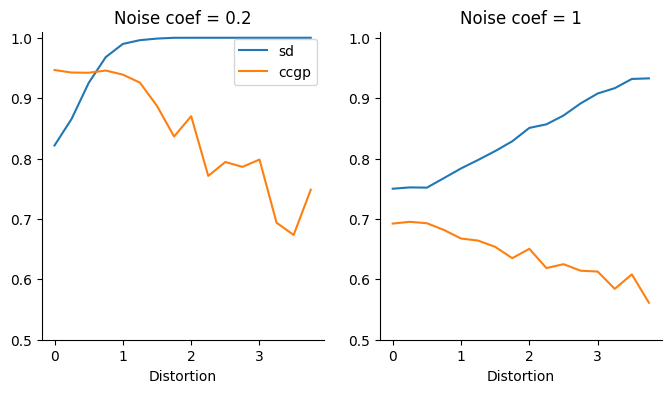

In [49]:
df_original_result = df_results[(df_results.cube_dimension == 3) & (df_results.embed_dimension == 100)]

fig, axs = plt.subplots(1, 2, figsize = (8, 4))
for ax, noise_coef in zip(axs, [0.2, 1]):
    df1 = df_original_result[df_original_result.noise_coef == noise_coef]
    ax.plot(df1.distort_magnitude, df1.sd, label = 'sd')
    ax.plot(df1.distort_magnitude, df1.ccgp, label = 'ccgp')
    ax.set_title(f"Noise coef = {noise_coef}")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0.5, 1.01)
    ax.set_xlabel("Distortion")
axs[0].legend()